In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from PIL import Image
from collections import Counter

In [5]:
data_path=Path("../data/raw-img")

In [62]:
for animal in os.listdir(data_path):
    print(f"{animal}")

cane
cavallo
elefante
farfalla
gallina
gatto
mucca
pecora
ragno
scoiattolo


Инфа о фотке: (300, 225), JPEG


(np.float64(-0.5), np.float64(299.5), np.float64(224.5), np.float64(-0.5))

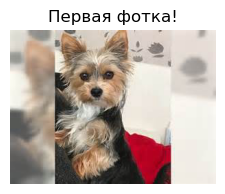

In [63]:
fil1 = next(data_path.iterdir())
img_path = next(fil1.iterdir())

img = Image.open(img_path)
print(f"Инфа о фотке: {img.size}, {img.format}")

plt.figure(figsize=(3, 2))
plt.title("Первая фотка!")
plt.imshow(img)
plt.axis('off')

(225, 300, 3)


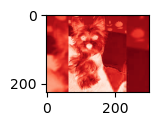

In [64]:
imga = np.array(img)
print(imga.shape)

plt.figure(figsize=(2, 1))
plt.imshow(imga[:, :, 0], cmap='Reds')

In [65]:
# пример для первой фотки

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225] )
])

img_tensor = transform(img)

Всего фоток: 26179, названия классов: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Метка: 0, класс: cane


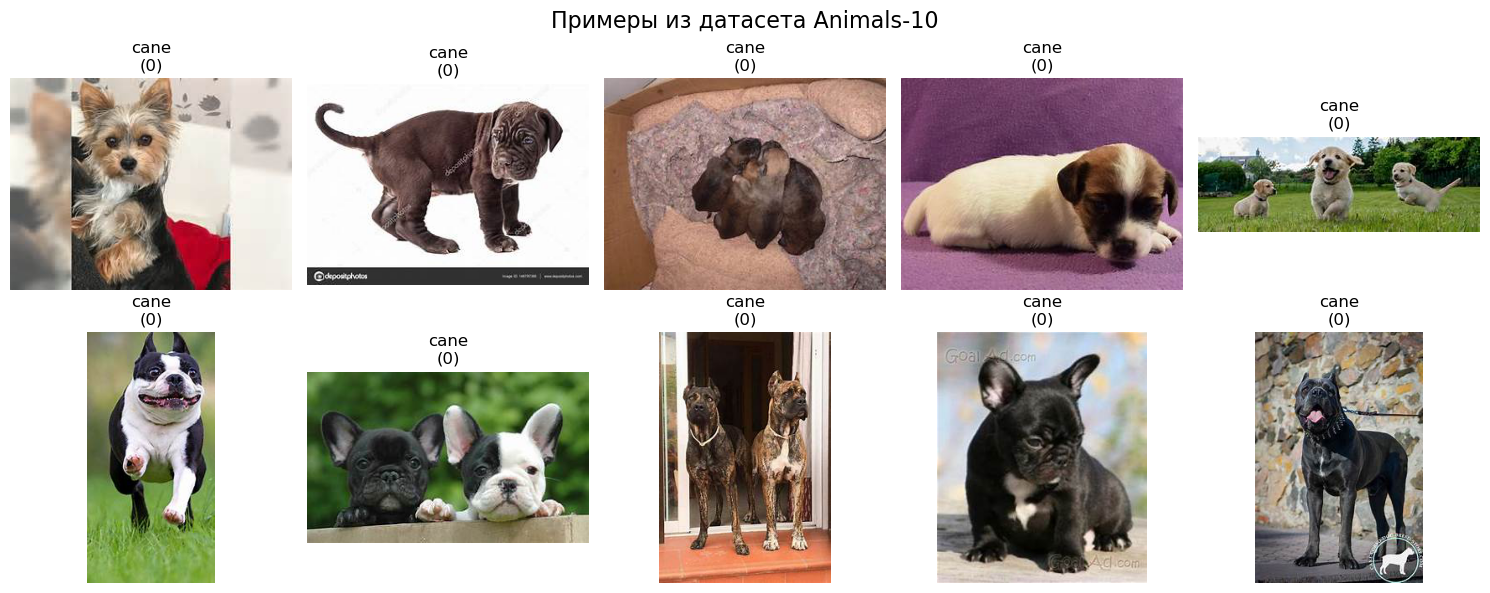

In [66]:
from torchvision.datasets import ImageFolder

dataset = ImageFolder(data_path)
print(f"Всего фоток: {len(dataset)}, названия классов: {dataset.classes}")

img, label = dataset[0]
print(f"Метка: {label}, класс: {dataset.classes[label]}")

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    img, label = dataset[i]
    axes[i//5, i%5].imshow(img)
    axes[i//5, i%5].set_title(f"{dataset.classes[label]}\n({label})")
    axes[i//5, i%5].axis('off')

plt.suptitle("Примеры из датасета Animals-10", fontsize=16)
plt.tight_layout()
plt.show()

(tensor([[[0.9059, 0.9020, 0.8980,  ..., 0.9412, 0.9412, 0.9451],
         [0.9059, 0.9020, 0.8980,  ..., 0.9412, 0.9412, 0.9451],
         [0.9020, 0.8980, 0.8941,  ..., 0.9373, 0.9373, 0.9412],
         ...,
         [0.3373, 0.3294, 0.3255,  ..., 0.9529, 0.9529, 0.9529],
         [0.3333, 0.3294, 0.3255,  ..., 0.9529, 0.9529, 0.9529],
         [0.3569, 0.3255, 0.3255,  ..., 0.9569, 0.9569, 0.9529]],

        [[0.9059, 0.9020, 0.8980,  ..., 0.9137, 0.9137, 0.9176],
         [0.9059, 0.9020, 0.8980,  ..., 0.9137, 0.9137, 0.9176],
         [0.9020, 0.8980, 0.8941,  ..., 0.9098, 0.9098, 0.9137],
         ...,
         [0.3451, 0.3373, 0.3333,  ..., 0.9333, 0.9333, 0.9333],
         [0.3412, 0.3373, 0.3333,  ..., 0.9333, 0.9333, 0.9333],
         [0.3647, 0.3333, 0.3333,  ..., 0.9373, 0.9373, 0.9333]],

        [[0.8667, 0.8627, 0.8588,  ..., 0.8902, 0.8902, 0.8941],
         [0.8667, 0.8627, 0.8588,  ..., 0.8902, 0.8902, 0.8941],
         [0.8627, 0.8588, 0.8549,  ..., 0.8863, 0.8863, 0

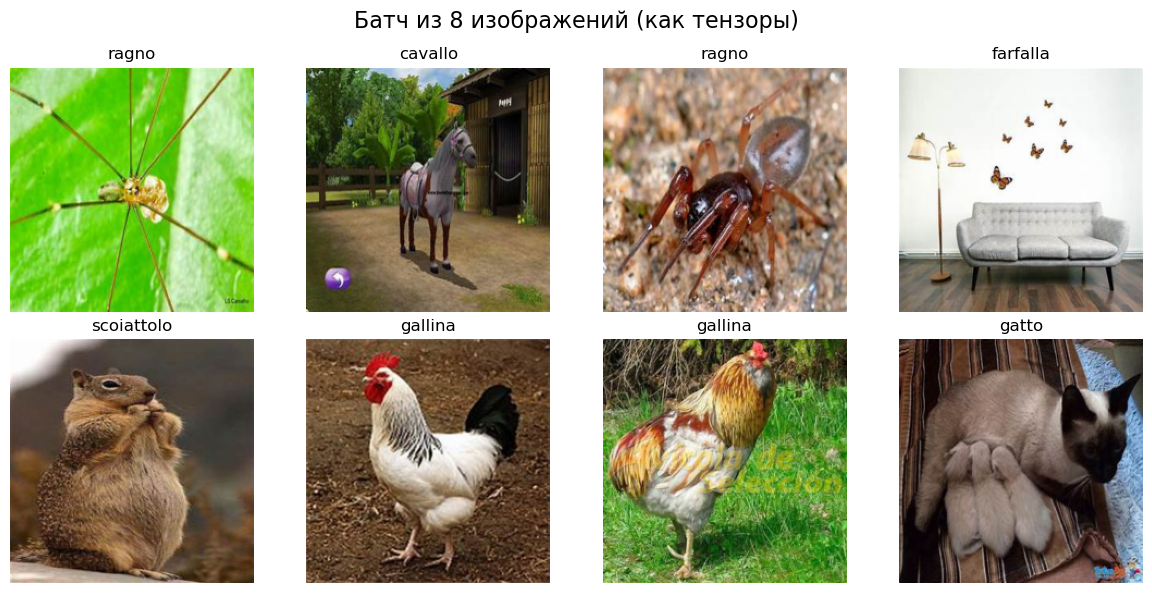

In [69]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), # всё в один размер
    transforms.ToTensor() #тензор
])

dataset_t = ImageFolder(str(data_path), transform=transform) # Теперь элемент - тензор вида [3, 224, 224], канал ширины высота

print(dataset_t[0])

batch_size = 8
loader = DataLoader(dataset_t, batch_size=batch_size, shuffle=True) # Теперь элемент - батч вида [8, 3, 224, 224], 8 тензоров

# псмотрим н абатч
for i, (images, labels) in enumerate(loader):
    if i == 0:
        print(f"Images shape: {images.shape}, images type: {type(images)}, labels shape: {labels.shape}, Labels: {labels.tolist()}")
        
        # грвфик 
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        axes = axes.ravel() # для того чтобы оси из 2*4 стали 1..8
        
        for i in range(batch_size):
            # images[i] имеет размер [3, 224, 224], переставляем оси для matplotlib
            img_np = images[i].permute(1, 2, 0).numpy()  # [224, 224, 3]
            axes[i].imshow(img_np)
            axes[i].set_title(f"{dataset_t.classes[labels[i]]}")
            axes[i].axis('off')
        
        plt.suptitle(f"Батч из {batch_size} изображений (как тензоры)", fontsize=16)
        plt.tight_layout()
        plt.show()
        break